<a href="https://colab.research.google.com/github/Zyuuu-G/Optics_and_Atomic_Physics/blob/main/mode_lock_laser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optics extension
#Mode-locked Laser Theory
###Ziyu Gao
###11/09/2022

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# part 1

t, i, n= symbols('t i n')
E0 = 1
k = 2*pi/800e-9 # 800nm
omega = 3e8*k

FSR = 80e6  # 80 MHz

#E1 = E0/10*Sum(cos(-i*omega*t),(i,3000,3010))# starting at mode # 3000

period = 2*pi/omega # plot 2 period
display(period)
#p1 = plot(E1,(t,-period,period),title = 'E')



2.66666666666667e-15

1.25e-08   2.35619449019235e+15  Sum(cos(t*(160000000.0*pi*i + 750000000000000.0*pi)), (i, 0, 10))


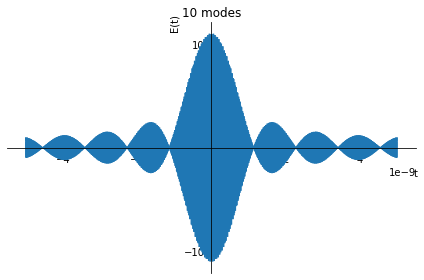

In [ ]:
# 10 modes
E10 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,10))# modified shifted omega0
print(1/FSR,' ',omega.evalf(),'',E10)

p10 = plot(E10.doit(),(t,-5e-9,5e-9),adaptive=False, nb_of_points=5000,show=False,title='10 modes',ylabel='E(t)')
p10.show()

### After zooming in on the x-axis (t), the beam width is found to be 2*1.4e-9
# beam width = 2.8ns

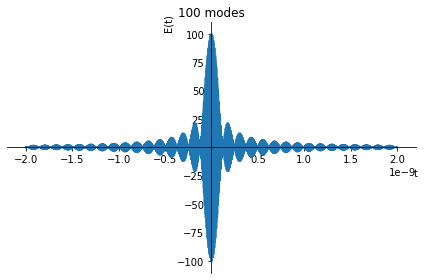

In [ ]:
# 100 modes
E100 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,100))

p100 = plot(E100.doit(),(t,-2e-9,2e-9),adaptive=False, nb_of_points=8000,show=False,title='100 modes',ylabel='E(t)')
p100.show()
# plot t range from 0 to 0.15e-9 find the pluse ends at ~0.124e-9, double this number to get pulse width
# pulse width = 0.248ns

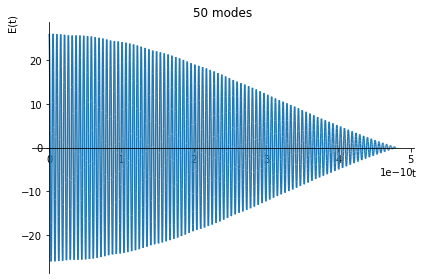

In [ ]:
# 1000 modes
# I tried to plot 1000 and found out if I go up to 500 sums, the code will break
# Insted, I'll plot from 200 to 400 and try to find the pulse width of them by zooming in

#E200 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,200))
#p200 = plot(E200.doit(),(t,0.062e-9,0.06219e-9),adaptive=False, nb_of_points=20000,title='200 modes',ylabel='E(t)')
## 200 modes pulse width = 0.12438ns

#E300 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,300))
#p300 = plot(E300.doit(),(t,0.04e-9,0.04153e-9),adaptive=False, nb_of_points=20000,title='300 modes',ylabel='E(t)')
## 300 modes pulse width = 0.08306ns

#E400 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,400))
#p400 = plot(E400.doit(),(t,0.0311e-9,0.03117e-9),adaptive=False, nb_of_points=20000,title='400 modes',ylabel='E(t)')
## 400 modes pulse width = 0.06234ns

##p50 = plot(E50.doit(),(t,0e-9,0.245e-9),adaptive=False, nb_of_points=20000,title='50 modes',ylabel='E(t)')
## 50 modes pulse width = 0.49ns

##E1 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,1))
#plot(E1.doit(),(t,0e-9,6.25e-9),adaptive=False, nb_of_points=2000,title='50 modes',ylabel='E(t)')
## 1 modes pulse width = 12.5, 1/FSR

E25 = E0*Sum(cos((omega+i*(2*pi*FSR))*t),(i,0,25))
plot(E25.doit(),(t,0e-9,0.48e-9),adaptive=False, nb_of_points=2000,title='50 modes',ylabel='E(t)')
## 1 modes pulse width = 12.5, 1/FSR



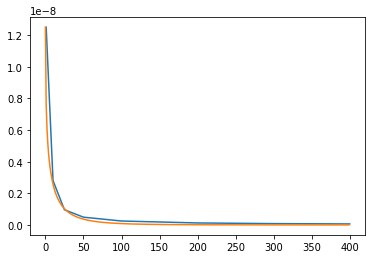

In [ ]:
plt.plot ([1,10,25,50,100,200,300,400],[12.5e-9,2.8e-9,.96E-9,0.49e-9,.248e-9,.12438e-9,.08306e-9,.06234e-9])
x = np.arange(0,400)

plt.plot (12.5e-9*np.exp(-0.5*x**0.5)) # plot exp on the same graph to compare with it (orange)

# plot the pulse width aginst the # of modes, looks like an exp decay.
# Maybe something like y = (1/FSR)*e^(-(#)*x**(#)) , y for width, x for # of modes, # are some constent

In [ ]:
# part 2.

d = 0.001/1200 # m
# assme the angle of the grating "tooth" are 30deg to the surface
thetam, m= symbols('thetam m')
thetai  = 60*pi/180
red = 700e-9
IR = 1000e-9
m = -1
thetamred = asin(m*red/d+sin(thetai))
thetamIR = asin(m*IR/d+sin(thetai))
#thetamIR = Sum(asin(m*IR/d+sin(thetai)),(m,0,10))
print(thetamred.evalf())
Lred=(0.01/(cos(thetamred)))*(1+cos(thetamred+pi/6))
LIR=(0.01/(cos(thetamIR)))*(1+cos(thetamIR+pi/6))

diff = 2*(LIR-Lred)
print(diff.evalf())

tdiff = diff/3e8
print('timedelay ',tdiff.evalf())

# something is wrong with thw calculation, there's not supposed to have a imaginary part
# thus, we know it has to be in the m=-1 mode

0.0260283426084697
0.00501506545453926
timedelay  1.67168848484642e-11


In [ ]:
# try plot the time delay over inciednt angle for fun
#theta = symbols ('theta')
#thetm = asin(-1*red/d+sin(theta))
#L=(0.01/(cos(thetamIR)))*(1+cos(thetamIR+pi/6))

In [ ]:
m = 1
thetamred = asin(m*red/d-sin(thetai))
thetamIR = asin(m*IR/d-sin(thetai))

print(thetamIR.evalf())
Lredd=(0.01/(cos(thetamred)))*(1+cos(thetamred+pi/6))
LIRr=(0.01/(cos(thetamIR)))*(1+cos(thetamIR+pi/6))

difff = 2*(LIRr-Lredd)
print(difff.evalf())

tdifff = difff/3e8
print('timedelay ',tdifff.evalf())

# don't know if I'm suppose to do this, I fliped the sign of sin(theta).

0.340517153305581
-0.00259199596921771
timedelay  -8.63998656405903e-12


#Reflection
####This extension cost about 3 hours to do exclude the time gotten stuck. Learned some about the relationship between number of mode and the resulting pulse width.
#### for part two,I had no idead how to make stuff look reasonable, mabe I still understood the equation wrong after looking it up on one of the thorlabs's website.

In [ ]:
T = np.arange(-5e-9,5e-9,0.001)
print(T)
i = np.arange(0,10,1)
sum = np.zeros([100])
for i in range(0,10):
  E = np.cos((2.35619449019235e+15+i*1.25e-08)*T)
  print(E[0])
  sum = sum +E
print(sum)

In [ ]:
plot(E01,(t,-5e9,5e9), nb_of_points=10000)

In [ ]:
E100 = E0*Sum(cos((omega+i*(1/FSR))*t),(i,0,100))# modified shifted omega0
plot(E100,(t,-5e9,5e9), nb_of_points=10000)

below from hw 5


In [ ]:
E3 = E0/3*Sum(cos(-i*omega*t),(i,1,3))
E10 = E0/10*Sum(cos(-i*omega*t),(i,1,10))

period = 2*pi/omega # plot 2 period
display(period)

p1310 = plot(E1,E3,E10,(t,-period,period),title = 'E1, E3, E10',show=False)
pE = plot(E1+E3+E10,(t,-period,period),title = 'E')
p1310[0].line_color='red'   # E1 red
p1310[1].line_color='blue'  # E3 blue
p1310[2].line_color='green' # E10 green

display(pE)
p1310.show()

In [ ]:
E100 = E0/100*Sum(cos(-i*omega*t),(i,1,100))
plot(E100,(t,-period,period),title = 'E100')
## this took forever to load

In [ ]:
# problem 5.2 (Steck)

Io,k,theta,x = symbols('Io k theta x')
k = 2*pi/450e-9  #450nm laser
Io = 1  # why not
#theta = 0.02
I_screen = 2*Io*(1 + cos(k*sin(theta)*x))

p1 = plot(I_screen.subs(theta,0.1), (x,-0.0001,0.0001),title = 'pattern on x-axis (intensity vs x @theta = 0.1)')
p2 = plot(I_screen.subs(theta,0.05), (x,-0.0001,0.0001),title = 'pattern on x-axis (intensity vs x @theta = 0.05)')
p3 = plot(I_screen.subs(theta,0.01), (x,-0.0001,0.0001),title = 'pattern on x-axis (intensity vs x @theta = 0.01)')
p4 = plot(I_screen.subs(theta,0.005), (x,-0.0001,0.0001),title = 'pattern on x-axis (intensity vs x @theta = 0.005)')
p5 = plot(I_screen.subs(theta,0.001), (x,-0.0001,0.0001),title = 'pattern on x-axis (intensity vs x @theta = 0.001)')
p6 = plot(I_screen.subs(theta,0.0005), (x,-0.0001,0.0001),title = 'pattern on x-axis (intensity vs x @theta = 0.0005)')

display(p1,p2,p3,p4,p4,p6)
### as the plots showing, bigger misalignment will result larger saperation distance of the peaks of the interfrence pattern. the wave is more spreaded in the x direction.